In [54]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
%matplotlib inline

In [26]:
 weather_data = pd.read_csv("180703_weather_data.csv")

In [55]:
weather_data.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,FRGT,FRTH,GAHT,...,WT16,WT17,WT18,WT19,WT21,WT22,WV20,Year,Month,Day
0,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-01,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,01
1,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-02,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,02
2,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-03,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,03
3,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-04,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,04
4,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-05,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,05


In [28]:
weather_data.columns


Index([u'STATION', u'NAME', u'DATE', u'ACMH', u'ACSH', u'AWND', u'FMTM',
       u'FRGT', u'FRTH', u'GAHT', u'PGTM', u'PRCP', u'PSUN', u'SNOW', u'SNWD',
       u'TAVG', u'TMAX', u'TMIN', u'TOBS', u'TSUN', u'WDF1', u'WDF2', u'WDF5',
       u'WDFG', u'WDFM', u'WESD', u'WSF1', u'WSF2', u'WSF5', u'WSFG', u'WSFM',
       u'WT01', u'WT02', u'WT03', u'WT04', u'WT05', u'WT06', u'WT07', u'WT08',
       u'WT09', u'WT10', u'WT11', u'WT13', u'WT14', u'WT15', u'WT16', u'WT17',
       u'WT18', u'WT19', u'WT21', u'WT22', u'WV20'],
      dtype='object')

In [29]:
#weather_data[['TMAX']]
#weather_data[['TMIN']]
#weather_data[['PRCP']]
#weather_data[['PSUN']]
#weather_data[['SNOW']]
#weather_data[['SNWD']]
#weather_data[['TSUN']]
#weather_data[['WDFG']]
#weather_data[['WDF2']]
#weather_data[["WDF5"]]
#weather_data[["ACMH"]]
#weather_data[["ACSH"]]
#weather_data[["AWND"]]

In [30]:
max_temp_mean = weather_data["TMAX"].mean()
min_temp_mean = weather_data["TMIN"].mean()
prcp_mean = weather_data["PRCP"].mean()
percent_sun_mean = weather_data["PSUN"].mean()
snow_mean = weather_data["SNOW"].mean()
snow_depth_mean = weather_data["SNWD"].mean()
daily_sun_mean = weather_data["TSUN"].mean()
peak_wind_mean = weather_data["WDFG"].mean()
two_min_wind_mean = weather_data["WDF2"].mean()
five_min_wind_mean = weather_data["WDF5"].mean()
total_cloud_mean = weather_data["ACMH"].mean()
sun_cloud_mean = weather_data["ACSH"].mean()
wind_speed_mean = weather_data["AWND"].mean()

In [31]:
#pd.isnull(weather_data["TMAX"])
#pd.isnull(weather_data["PRCP"])
#pd.isnull(weather_data["PSUN"])
#pd.isnull(weather_data["SNOW"])
#pd.isnull(weather_data["TSUN"])

In [32]:

weather_data["TMAX"] = weather_data["TMAX"].fillna(max_temp_mean)
weather_data["TMIN"] = weather_data["TMIN"].fillna(min_temp_mean)
weather_data["PRCP"] = weather_data["PRCP"].fillna(prcp_mean)
weather_data["PSUN"] = weather_data["PSUN"].fillna(percent_sun_mean)
weather_data["SNOW"] = weather_data["SNOW"].fillna(snow_mean)
weather_data["SNWD"] = weather_data["SNWD"].fillna(snow_depth_mean)
weather_data["TSUN"] = weather_data["TSUN"].fillna(daily_sun_mean)
weather_data["WDFG"] = weather_data["WDFG"].fillna(peak_wind_mean)
weather_data["WDF2"] = weather_data["WDF2"].fillna(two_min_wind_mean)
weather_data["WDF5"] = weather_data["WDF5"].fillna(five_min_wind_mean)
weather_data["ACMH"] = weather_data["ACMH"].fillna(total_cloud_mean)
weather_data["ACSH"] = weather_data["ACSH"].fillna(sun_cloud_mean)
weather_data["AWND"] = weather_data["AWND"].fillna(wind_speed_mean)

In [33]:
weather_data[["AWND"]]

,AWND
0,8.101824
1,8.101824
2,8.101824
3,8.101824
4,8.101824
5,8.101824
6,8.101824
7,8.101824
8,8.101824
9,8.101824


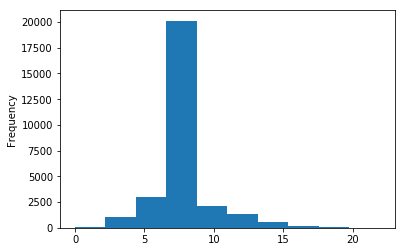

In [34]:
%matplotlib inline
weather_data["AWND"].plot.hist()



In [35]:
weather_data[["PSUN"]].describe()

,PSUN
count,28669.000000
mean,63.467849
std,17.280743
min,0.000000
25%,63.467849
50%,63.467849
75%,63.467849
max,100.000000


In [36]:
weather_data.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,FRGT,FRTH,GAHT,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
0,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-01,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-02,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-03,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-04,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-05,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
weather_data[["Year", "Month", "Day"]] = weather_data["DATE"].str.split("-",  expand=True)


In [38]:
pd_weather_data.head()



,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,FRGT,FRTH,GAHT,...,WT16,WT17,WT18,WT19,WT21,WT22,WV20,Year,Month,Day
0,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-01,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,01
1,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-02,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,02
2,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-03,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,03
3,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-04,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,04
4,USW00013893,"MEMPHIS INTERNATIONAL AIRPORT, TN US",1940-01-05,53.605916,58.022135,8.101824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,01,05


In [39]:

#weather_data = weather_data.drop(['FMTM', 'FRGT', 'FRTH', 'GAHT', 'PGTM'], axis = 1)
#weather_data = weather_data.drop(['TAVG', 'TOBS', 'WDF1', 'WDFM', 'WESD'], axis = 1)
#weather_data = weather_data.drop(['WSF1', 'WSF2', 'WDF5', 'WSFG', 'WSFM'], axis = 1)
#weather_data = weather_data.drop(['WT01', 'WT02', 'WT03', 'WT04', 'WT05'], axis = 1)
#weather_data = weather_data.drop(['WT06', 'WT07', 'WT08', 'WT09', 'WT10'], axis = 1)
#weather_data = weather_data.drop(['WT11', 'WT13', 'WT14', 'WT15'], axis = 1)
#weather_data = weather_data.drop(['WT16', 'WT17', 'WT18', 'WT18', 'WT19'], axis = 1)
#weather_data = weather_data.drop(['WT21', 'WT22', 'WV20'], axis = 1)
pd_weather_data = pd.DataFrame(weather_data)
#pd_weather_data = pd_weather_data.drop([0, 1, 2, 14], axis = 1)


# seperating data

In [52]:

labels = np.array(data['TMAX'])
#data = data.drop('TMAX', axis = 1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
data = np.array(pd_weather_data)

In [43]:
#data_modified = np.delete(data, np.s_[13], axis=1)

In [48]:
#print weather_data_list
#weather_data_list = list(data.columns)
#weather_data_list.pop(11)
#print weather_data_list

NameError: name 'weather_data_list' is not defined

#slicing the data

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


NameError: name 'labels' is not defined

In [ ]:
train_features[1, ]

In [23]:
#print train_labels[:1000]
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);



NameError: name 'train_features' is not defined

# creating the model

In [22]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

NameError: name 'rf' is not defined

In [ ]:
test_features

In [21]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)  
print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'errors' is not defined

In [ ]:
tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = weather_data_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [ ]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = weather_data_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

In [56]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(weather_data_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print "Varaiable:", " ", pair[0], "  ", "Importance:", " ", pair[1]



NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
rf.predict(np.array[53.60591603053435, 58.02213529243393, 8.101824335345007, 0.0,
       63.46784890426759, 0.0, 0.0, 73, 408.932830705963,
       177.02587432470855, 211.9070281591808, "2018", '07', '22'])